In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import seaborn as sns

# For reproducibility
np.random.seed(42)

# Parameters for the multi-layer network
num_layers = 2        # Number of layers (industries)
nodes_per_layer = 20  # Number of nodes (countries) per layer
mu, sigma = 50, 10    # Mean and std deviation for edge weights (normal distribution)

# Create a directed random network for each layer
G = nx.DiGraph()

# Adding nodes and edges with weights based on normal distribution
for layer in range(num_layers):
    # Add nodes to the graph with the new naming scheme (L0_a, L0_b, ...)
    for i in range(nodes_per_layer):
        node_label = f"L{layer}_{chr(97 + i)}"  # 'a' to 'j' for nodes
        G.add_node(node_label, layer=layer)
        
    # Add random edges within the layer
    edges = nx.gnp_random_graph(nodes_per_layer, 0.05, directed=True)
    for u, v in edges.edges():
        weight = abs(np.random.normal(mu, sigma))  # Positive weights
        G.add_edge(f"L{layer}_{chr(97 + u)}", f"L{layer}_{chr(97 + v)}", weight=weight)
    
    # Randomly add self-directed edges (loops)
    self_loop_nodes = np.random.choice(range(nodes_per_layer), size=int(nodes_per_layer * 0.3), replace=False)  # 30% chance for self-loops
    for i in self_loop_nodes:
        weight = abs(np.random.normal(mu, sigma))
        G.add_edge(f"L{layer}_{chr(97 + i)}", f"L{layer}_{chr(97 + i)}", weight=weight)

    # Add random edges between layers (except for the last layer)
    if layer < num_layers - 1:
        for i in range(nodes_per_layer):
            for j in range(nodes_per_layer):
                weight = abs(np.random.normal(mu, sigma))
                G.add_edge(f"L{layer}_{chr(97 + i)}", f"L{layer+1}_{chr(97 + j)}", weight=weight)
                G.add_edge(f"L{layer+1}_{chr(97 + j)}", f"L{layer}_{chr(97 + i)}", weight=weight)

# Visualizing the network
# pos = nx.spring_layout(G, seed=42)
# plt.figure(figsize=(12, 8))
# nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=12, font_weight='bold', edge_color='gray')
# plt.title("Multi-Layer Directed Network with Random Self-Loops and Consistent Node Labels (L0_a, L1_a, etc.)")
# plt.show()


In [2]:
# Calculate eigenvector centrality
eigen_centrality = nx.eigenvector_centrality_numpy(G, weight='weight')

# Display centralities for a few nodes
for node, centrality in list(eigen_centrality.items())[:50]:
    print(f"Node {node}: Centrality {centrality:.4f}")


Node L0_a: Centrality 0.1499
Node L0_b: Centrality 0.1492
Node L0_c: Centrality 0.1786
Node L0_d: Centrality 0.1776
Node L0_e: Centrality 0.1565
Node L0_f: Centrality 0.1681
Node L0_g: Centrality 0.1744
Node L0_h: Centrality 0.1606
Node L0_i: Centrality 0.1650
Node L0_j: Centrality 0.1521
Node L0_k: Centrality 0.1637
Node L0_l: Centrality 0.1455
Node L0_m: Centrality 0.1657
Node L0_n: Centrality 0.1625
Node L0_o: Centrality 0.1552
Node L0_p: Centrality 0.1405
Node L0_q: Centrality 0.1654
Node L0_r: Centrality 0.1429
Node L0_s: Centrality 0.1534
Node L0_t: Centrality 0.1510
Node L1_a: Centrality 0.1501
Node L1_b: Centrality 0.1544
Node L1_c: Centrality 0.1655
Node L1_d: Centrality 0.1546
Node L1_e: Centrality 0.1436
Node L1_f: Centrality 0.1447
Node L1_g: Centrality 0.1604
Node L1_h: Centrality 0.1614
Node L1_i: Centrality 0.1509
Node L1_j: Centrality 0.1602
Node L1_k: Centrality 0.1557
Node L1_l: Centrality 0.1400
Node L1_m: Centrality 0.1582
Node L1_n: Centrality 0.1653
Node L1_o: Cen

In [3]:
# Calculate IPR
centrality_values = np.array(list(eigen_centrality.values()))
ipr = np.sum(centrality_values**4)
print(f"Inverse Participation Ratio (IPR): {ipr:.4f}")


Inverse Participation Ratio (IPR): 0.0254


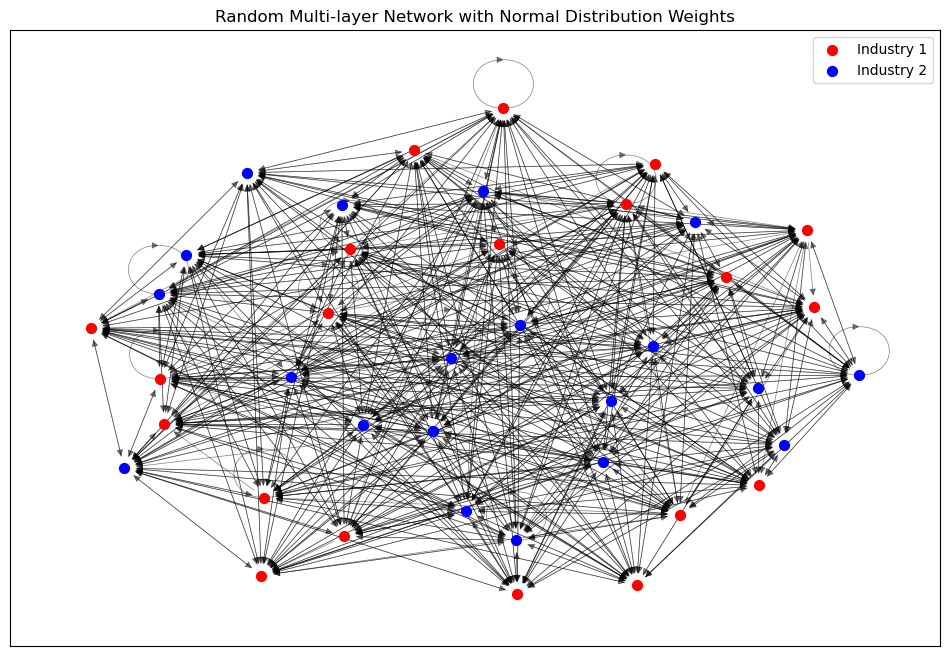

In [4]:
# Set up colors for each layer
layer_colors = ['red', 'blue']

# Draw the multi-layer network with color-coded layers
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(12, 8))
for layer in range(num_layers):
    nodes = [node for node, data in G.nodes(data=True) if data['layer'] == layer]
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=layer_colors[layer], label=f"Industry {layer+1}", node_size=50)
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.5)
plt.title("Random Multi-layer Network with Normal Distribution Weights")
plt.legend()
plt.show()


In [5]:
nx.average_clustering(G)

0.1317897206320611